# k-Nearest Neighbors (k-NN)

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.neighbors import KNeighborsRegressor

Import OSNIR Dataset and shuffle data

In [47]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_Shuffled_Data.csv')

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [48]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the k-Nearest Neighbors Model

In [49]:
model = KNeighborsRegressor(n_neighbors=15, weights='distance')
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [50]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [51]:
OSNIR_est = (model.predict(Input_num))

In [52]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[33.0, 3.0, 100.0, 50.0, 0.0, 9.0] => 9.936834 (expected 9.936834)
[6.0, -1.0, 50.0, 25.0, 0.0, 9.0] => 23.857060 (expected 23.857060)
[12.0, -5.0, 50.0, 25.0, 0.0, 3.0] => 22.358241 (expected 22.358241)
[16.0, 3.0, 10.0, 25.0, 12.5, 9.0] => 17.954984 (expected 17.954984)
[10.0, -1.0, 100.0, 25.0, 0.0, 9.0] => 16.183496 (expected 16.183496)
[7.0, 2.0, 100.0, 25.0, 0.0, 9.0] => 16.091254 (expected 16.091254)
[7.0, -2.0, 100.0, 25.0, 0.0, 3.0] => 17.885832 (expected 17.885832)
[13.0, 3.0, 100.0, 25.0, 12.5, 9.0] => 13.479461 (expected 13.479461)
[15.0, -6.0, 5.0, 25.0, 0.0, 9.0] => 29.028905 (expected 29.028905)
[14.0, -1.0, 50.0, 25.0, 0.0, 9.0] => 19.840868 (expected 19.840868)


In [53]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [54]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_kNN.csv",index=False)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.33444481e-04,
        3.33444481e-04, 0.00000000e+00, 3.33444481e-04, 1.33377793e-03,
        3.00100033e-03, 4.33477826e-03, 4.33477826e-03, 3.33444481e-03,
        9.33644548e-03, 9.66988996e-03, 1.40046682e-02, 1.40046682e-02,
        2.10070023e-02, 2.20073358e-02, 4.96832277e-02, 7.73591197e-02,
        6.42880960e-01, 5.70190063e-02, 3.13437813e-02, 1.13371124e-02,
        3.33444481e-03, 2.66755585e-03, 2.66755585e-03, 1.66722241e-03,
        2.00066689e-03, 6.66888963e-04, 1.00033344e-03, 1.00033344e-03,
        1.33377793e-03, 0.00000000e+00, 1.00033344e-03, 0.00000000e+00,
        6.66888963e-04, 3.33444481e-04, 0.00000000e+00, 0.00000000e+00]),
 array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
        -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
         0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
         2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ])

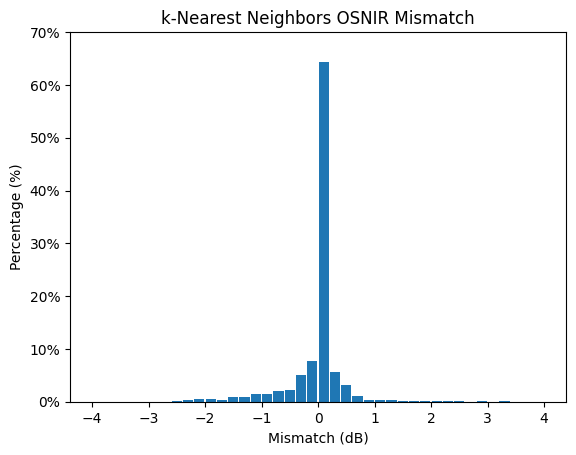

In [55]:
plt.title('k-Nearest Neighbors OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 0.7)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism,
         range=(-4,4),
         rwidth=0.9,
         bins=40,
         weights=np.ones(len(Mism))/len(Mism)
         )